![image](https://drive.google.com/uc?id=1iBMNGCrSdaLK9SD6BjsuNjB1DjHVkLZl)

Welcome to the lab! Before we get started here are a few pointers on Jupyter notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.

# Lab 1 : Car Model Classification with CNN
In this lab we will try to build a Vehicle Classifier to classify three different models of the car. We will collect 3 groups of images namely  Honda Civic, Toyota Altis and Volkswagen Passat to be our dataset. The  collected dataset will be used to train the Resnet50 CNN(Convolution Neural Network). Upon completion of the training, we will be able to classify an unknown image to give a prediction of the model of the car.  


We will build the car model classifier based on the following steps

1.   Colab python virtual environment     
2.   Import the libraries needed for the program
3.  Prepare the data
4.   Prepare the CNN model
5.  Train the model with the training set and evaluate its performance
6.   Use the trained model to classify input data



# 1. Colab python virtual environment

Colab is preinstalled with python virtual environment with the Tensorflow2. 
We will use this default virtual environment for the execrise. 
 



# 2. Import the libraries needed for the program
We will begin by importing the libraries that we need, mainly Keras.  
Keras is based on a minimal framework that provides a simpler way to create deep learning models based on TensorFlow.
Keras contains useful functions for pre-preprocessing of image data and definition of convolution neural network.
Matplotlib is used for data visualization. 



In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
print(tensorflow.__version__)

2.3.0


# 3. Prepare the data

Usually in ML, we divide our data into 3 different sets

- Training Data: Collection of sample data used to train the neural network.

- Validation Data: Collection of sample data used to provide an unbiased evaluation of neural netowork during the training.

- Test Data: Collection of sample data used to evaluate the trained neural network.

### 3.1 Collect data for training and validation

We have pre-collected data that are stored in the following directory structure.

For train data, it is stored in the path ./Lab1dataset/data/train.
```
./Lab1dataset/data/train
                           |- Honda
                           |- Toyota
                           |- Volkswagen 

```
Each of the above sub-directories(Honda, Toyota, Volkawagen) is stored with
60 different jpg images.


For validation data, it is stored in the path ./Lab1dataset/data/validation.
```
./Lab1dataset/data/validation.
                               |- Honda
                               |- Toyota
                               |- Volkswagen 
```
Each of the above sub-directories(Honda, Toyota, Volkawagen) is stored with
15 different jpg images.


For test data, it is stored in the path /Lab1dataset/prediction_images
```
./Lab1dataset/
    |- prediction_images

```
A few test images are stored in the above test directory.

Download the data and unzip it.








In [ ]:

!wget https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/datasets/day2-am/Lab1dataset.zip
!unzip Lab1dataset.zip


--2020-11-17 12:45:14--  https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/datasets/day2-am/Lab1dataset.zip
Resolving nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)... 52.219.128.79
Connecting to nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)|52.219.128.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45795760 (44M) [application/zip]
Saving to: ‘Lab1dataset.zip.1’

Lab1dataset.zip.1   100%[===================>]  43.67M  10.3MB/s    in 4.7s    

2020-11-17 12:45:19 (9.37 MB/s) - ‘Lab1dataset.zip.1’ saved [45795760/45795760]

Archive:  Lab1dataset.zip
replace Lab1dataset/data/train/Honda/100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Lab1dataset/data/train/Honda/100.jpg  
replace Lab1dataset/data/train/Honda/11105_m.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Lab1dataset/data/train/Honda/11105_m.jpg  
  inflating: Lab1dataset/data/train/Hon

In [ ]:
!ls

Lab1dataset  Lab1dataset.zip  sample_data


We will define the following variables for the different data path.

It will be easier for us to reference these paths in other sections of the code.

In [ ]:

data_dir_path='Lab1dataset/'
train_data_dir = data_dir_path+'data/train/'
validation_data_dir = data_dir_path+'data/validation/'
prediction_data_dir = data_dir_path+'prediction_images/'

### Exercise
Let explore the images we had collected for the train dataset.

Display the following images from the train data.

* image 1 ( train_data_dir+"Honda/100.jpg")
* image 2 (  train_data_dir+"Toyota/Altis.jpg")

What do you notice about the size of each of the image?
Read the printed image size ( height,width, color).

*color(1-greysacle, 3-color)

Why are we interested in the image size?

<details><summary>Click here for answer</summary> 
<br/>
    
When we build a Convolution Neural Network(CNN), we usually specify a fixed input size. Therefore we need to pre-process the collected images to the same size as the expected input before we can do training.
    
<br/>
</details>

(1413, 2700, 3)


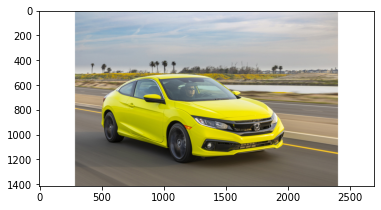

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# TODO: complete the code below
#image 1
img = mpimg.imread(#Add code)
print(img.shape)
imgplot = plt.imshow(img)


    

(2480, 2480, 3)


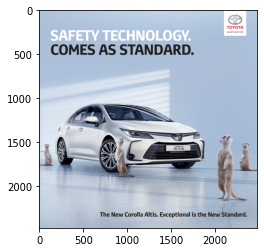

In [ ]:
# TODO: complete the code below
#image 2
img = mpimg.imread(#Add code)
print(img.shape)
imgplot = plt.imshow(img)

### 3.2 Prepare Data for training and validation

From the previous exercise, we noticed that the collected data need to be pre-processed before we can use it to train our CNN. In this section, we will look at some of the methods that can help us to do data pre-processing.

Data augmentation is a strategy that enables developer to significantly increase the diversity of data available through data pre-processing.

Data augmentation techniques such as resizing, rotation, and cropping are commonly used to train large neural networks.


![image](https://drive.google.com/uc?id=1Y1V7I79GthoHvqjVYfgaCZHloDh1VZ2z)

Kera provides us a function to do data augmentation. We can configure the parameters in the function to achieve the required image pre-processing. We will do some of the parameters configuration in the exercise.
 



### Exercise
We will configure the image augmentation parameters in the Keras ImageDataGenerator() function for the train and validation data.

Here are some for the parameters.

- rescale factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided. For training neural network, we usually want to keep our values small (e.g. between 0 and 1.0) so that the network can be more stable and converge faster.

- shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees) eg. 0.2 degrees

- zoom_range: Float. zoom range for width and height. eg. 0.2

- horizontal_flip: Boolean. Randomly flip inputs horizontally.eg. True

Set the appropriate parameter values in the following codes marked with #add code 


Also examine the parameter *target_size* in the function train_datagen.flow_from_directory() and validation_datagen.flow_from_directory.

What is the target_size we need to choose for the data pre-processing?
<details><summary>Click here for answer</summary> 
<br/>

As mentioned previously, we usually specify an expected fixed data input size when we build a CNN. Therefore we need to set the target_size to be the same as the expected input size for pre-processing. How do we know the expected size? We will find out in the following section when we setup our CNN.
    
<br/>
</details>

<br/>

We will put the above pre-processing steps for train and validation inside the function name PrepareData().


In [ ]:
#Prepare Data for training and validation

def PrepareData(img_width,img_height,batch_size ):

    # This augments the data. This is usefull when working with a small sample size
    # TODO: complete the code below
    train_datagen = ImageDataGenerator(
        rescale= #Add code,
        shear_range= #Add code,
        zoom_range= #Add code,
        horizontal_flip= #Add code)
    
    # TODO: complete the code below
    validation_datagen = ImageDataGenerator(rescale=#Add code)

    print("train generator")
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    print("validation generator")
    validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

    return train_generator,validation_generator

### 3.3 Get the total number of predicted classes/labels

The label of the training samples are determined by the subdirectory name, e.g.In the train sub-directories, Honda is the label to tag to all the images collected for that group.

In our case, the number of predicted classes (or labels) are based on the numbers of sub-directories in the train folder.


### Exercise
We are going to find the number of classes and the labels for our collected data.

Where can we get the information for the number of classes and the Label names?
Look for the directory where we stored our train data. Complete the following code. 

Observe the number of classes printed at the output. Why the number of classes is 3?
<details><summary>Click here for answer</summary> 
<br/>
In our classification problem, we need to classify three types of cars. Therefore the classes is defined to be 3.

The number of classes is to allow the CNN to predict the number of outputs.
    
<br/>
</details>





In [ ]:
# Gets the total no. of classes and labels

# TODO: complete the code below -what is the directory of the train data
classes = ImageDataGenerator().flow_from_directory(#Add code).class_indices
print(classes)
print("number of classes="+ str(len(classes)))
num_classes = len(classes)

Found 193 images belonging to 3 classes.
{'Honda': 0, 'Toyota': 1, 'Volkswagen': 2}
number of classes=3


# 4. Prepare the CNN Model

### 4.1 CNN Convolution Netural Network


![image](https://drive.google.com/uc?id=1TvHHScdeRsKcQTNiVpbKu1lUnJlLQLim)

There are many CNN implementation, such as LeNet, AlexNet, VGG, GoogLeNet, ResNet and more.

In this lab we will be using ResNet50 CNN.

The ResNet50 is built from the different combination of the following layers

        *   Conv2D-> number of feature maps, feature map size (width x height)
        *   Activation function -> relu , sigmoid 
        *   MaxPooling-> kernel size (width x height)

together with the output layers

        *   Flatten-> 2D to 1D
        *   Dense layer->number of neutrons
        *   Activation Function->softmax(probability of each the classes)



### Execrise
We have a brief understanding of how the ResNet50 layers are formed. In this exercise, we will customise our ResNet50 to train our pre-process dataset.

Assuming we want to have input image size of (197, 197, 3) (height, width, channels). In the code below, change the function ResNet50() to have the the specified input size.

- In the following code, goto function ResNet50() set the parameters input_size to (width,height,color)->(197,197,3)

Based on the number of classes we have discuss in the previous exercise 3.3, what do you think is the number of neurons required in the output Dense layer? 

- Add the number of neurons required in the output Dense layer? 


Run the function compileModel() to build the custom ResNet50.

Observe the print out of the ResNet50 layers. What have we customised in our ResNet50 CNN?

<details><summary>Click here for answer</summary> 
<br/>
    
We have setted our customise ResNet50 with the input size (197,197,3), and output to be (3)

    
<br/>
</details>



In [ ]:
def compileModel():
    print("compiling model")
    learning_rate=1e-4

     ## TODO: Add in the input size
    conv_base = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape=(#Add code, #Add code, #Add code))

    model = models.Sequential()
    model.add(conv_base)
    #Add dense and classification layer
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    ## TODO: Change the Output Dense layer to have the correct number of neurons  
    model.add(layers.Dense(3, activation='softmax'))

    print(conv_base.summary())
    print(model.summary())
 
    model.compile(loss='categorical_crossentropy',optimizer= optimizers.Adam(lr=learning_rate),metrics=['accuracy'])
    for layer in conv_base.layers:
      layer.trainable = False
    for layer in conv_base.layers[-4:]:
      layer.trainable = True
    return model

In [ ]:
compileModel()

compiling model
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 197, 197, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 203, 203, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 99, 99, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 99, 99, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________

# 5. Train the model with the training set and evaluate it performance

### 5.1 Train and validate the model


![image](https://drive.google.com/uc?id=1E4kipAQNfq9vKY-cNRmb_y2Dj_t4gfBN)

With the preprocessed training and validation dataset and our defined model. We can start to preform the training process.
As part of the training, we will also need to set some parameter values in the training function (the ``fit()``)

- Set the number of epoch to  indicates the number of passes of the entire training dataset the model has to complete.

- When we have a huge data set it not possible to load the entire data to run one epoch of training. Setting Step per epoch allow huge data to divide into batches to complete entire training.

We save the final training iteration weights into to a binary data format(.h5).

In the trainModel() function it will save the final iteration weights into a file "custom_w_supervision_try2.h5".
We also set a ModelCheckpoint() function to monitor the validation accuracy in each of the training iterations. This function will save the weights into a file "custom_w_supervision_try2_best.h5" with the best validation accuracy.


In [ ]:
best_model = tensorflow.keras.callbacks.ModelCheckpoint(data_dir_path+'custom_w_supervision_try2_best.h5', monitor='val_loss',save_best_only=True,save_weights_only=False,verbose=1, mode='min')


def trainModel(train_data, validation_data,model):

    print("starting training.... ")
    hist = model.fit_generator(
        (train_data),
        steps_per_epoch=nb_train_samples // batch_size, # The accumulated amount of steps
        epochs=epochs,
        validation_data=validation_data,
        callbacks=[best_model]
    )

    plotVal_plotLoss(hist)
    model.save_weights(data_dir_path+'custom_w_supervision_try2.h5') # Saving the compile weights

This following function plotVal_plotLoss() is to plot the accuracy and loss result of the model during the training.
 
- Loss is a number that indicates the difference between the model's prediction output with the ground truth. 

- Accuracy is a metric that can be applied to classification tasks only. It describes just what percentage of your train/test data are classified correctly.


In [ ]:
# This function generates graphs of the loss and the accuracy of the model
def plotVal_plotLoss (model) :

    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss_plot_4 (simulated vgg1)2')
    plt.show()

    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss_plot_4 (simulated vgg1)2')
    plt.show()


### Exercise

Now we are ready to start the training process.

From section 4.1 exercise, we have set the ResNet50 input size. We preprocess our data to the same width and height before it can be used for the training.

- Set the PrepareData() with the correct ``image_height`` and ``Image_width`` 
<details><summary>Click here for answer</summary> 
<br/>
        image_height=197  
        Image_width=197
<br/>
</details>


Set the number of epoch(iterations) to conduct the training

- At the  variable epochs set a number(integer number) 


The trainModel() function will start the training.

- Since we have 180 samples, and we are using a batch size of 2, how many training steps are required to go through all the samples? Observe the training output and see whether the number of steps is the same as your answer. 
<details><summary>Click here for answer</summary>
<br/>
     Step per ecoph = 90 
<br/>
</details>


You can vary the epochs to observe the model accuracy and loss values.

- What do you notice when epochs are varied?
<details><summary>Click here for answer</summary> 
<br/>
Typically the increase in the epochs will reduce the loss and improve the prediction accuracy.    

<br/>
</details>

  


train generator
Found 193 images belonging to 3 classes.
validation generator
Found 46 images belonging to 3 classes.
compiling model
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 197, 197, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 203, 203, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 99, 99, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 99, 99, 64)   256

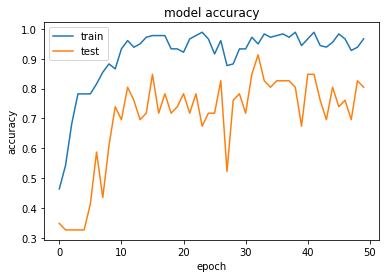

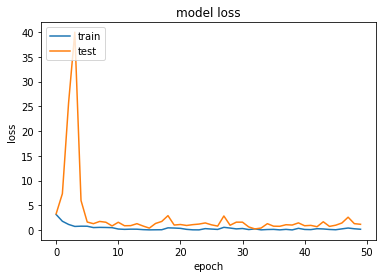

In [ ]:
# dimensions of our images.
## TODO: Set the image width and height 
img_width, img_height = 197, 197

# The batch size represents the total amount of pictures that are included in each iteration.
## TODO: Set the batch size
batch_size = 2

#Prepare data
train_data, validation_data = PrepareData(img_width,img_height,batch_size)

#Load Model
model=compileModel()

# Defining the total amount of samples in both the training and validation set
nb_train_samples =180
nb_validation_samples =45

## TODO: Set the number to training iterations
epochs = #Add code

#Start the training model
trainModel(train_data, validation_data, model)



# 6. Use the trained model to classify input data



### 6.1 Setup a predict image function

After completed the training for the customised ResNet50 CNN model. The following predictImg() function will use the trained model to predict the output of an unknown image.


In [ ]:

def predictImg(path,img_width,img_height ,model):
    imagep = image.load_img(path, target_size=(img_width, img_height))
    x = image.img_to_array(imagep)
    x = x / 255  # Insures that images are normalized, so it can be compared test on a model that also used normalized training and validation images

    x = np.expand_dims(x, axis=0) # flattens the image
    prediction = model.predict(x) # Extract the prediction made by the model
    print(path)
    print(prediction)
    findLabel(prediction, 0.2, path)


In [ ]:
def findLabel(test, threshold, path):
    if (max(test[0]) < threshold):
        print("no class could be defined for " + path + " with threshold 0.85")
    else:
        m = max(test[0])
        index = [i for i, j in enumerate(list(test[0])) if j == m]
        #labeler(index[0], path)
        label = list(classes.keys())[index[0]]
        print("The image '" + path + "' belongs to class: " + label) # Prints the prediction


### Exercise

Now we are ready to use the trained model to predict the image.

First we need to load our Resnet50 CNN model with the trained weights. 
- During traning fit() function call the ModelCheckPoint() to monitor and save the weights with best validation accuracy. Find where is the directory and file name for best weights file. Input into the model.load_weights() function in the following code.
<details><summary>Click here for answer</summary> 
<br/>
data_dir_path+'custom_w_supervision_try2_best.h5'
<br/>
</details>


Next we need to specify an unknown images file for prediction.
- Find a test image file in the directory './Lab1dataset/prediction_images/' pass into  predictImg() function
<details><summary>Click here for answer</summary> 
<br/>
    eg.    prediction_data_dir+"honda1.jpg"
<br/>
</details>

Try to load different test images to predict the output. You can check the predicted label against the test image file name. The test image file name is the ground truth label.


In [ ]:

# np.set_printoptions(suppress=True, precision=3)

model = compileModel()

## TODO: Set the best-trained weigth dir and file name 
model.load_weights(data_dir_path+#Add code)



compiling model
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 197, 197, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 203, 203, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 99, 99, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 99, 99, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________

In [ ]:
## TODO: Set the unknown image dir and file name
predictImg(prediction_data_dir+#Add code, 197, 197 , model) 

Lab1dataset/prediction_images/toyota1.jpg
[[7.4887917e-06 9.9513668e-01 4.8558624e-03]]
The image 'Lab1dataset/prediction_images/toyota1.jpg' belongs to class: Toyota


In [ ]:
model_best =tensorflow.keras.models.load_model(data_dir_path+"custom_w_supervision_try2_best.h5")


In [ ]:
## TODO: Set the unknown image dir and file name
predictImg(prediction_data_dir+"honda1.jpg", 197, 197 , model_best) 

Lab1dataset/prediction_images/honda1.jpg
[[0.26450267 0.02591461 0.70958275]]
The image 'Lab1dataset/prediction_images/honda1.jpg' belongs to class: Volkswagen
